<h1>Степанов Вячеслав Анатольевич </h1>

<h3>БСВ23-01 </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_show(x, f_values, x_min, f_min,a0,b0, method_name):
    plt.plot(x, f_values, 'bo-', label='f(x)')
    plt.plot(x_min, f_min, 'ro', label='Минимум f(x)')
    plt.axvline(x=a0, color='g', linestyle='--', label='Границы интервала')
    plt.axvline(x=b0, color='g', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Метод ' + method_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Методы минимизации 

## Метод равномерного поиска

In [3]:
# Метод Свенна для поиска начального интервала
"""def sven_method(x0, t, func):
    f0 = func(x0)
    f1 = func(x0 - t)
    f2 = func(x0 + t)
    
    if f1 >= f0 and f0 <= f2:
        return x0 - t, x0 + t
    else:
        raise ValueError("Не удалось найти начальный интервал неопределенности методом Свенна")
"""
# Алгоритм равномерного поиска
def uniform_search(a0,b0,func):
    epsilon = 0.01
    iteration = int(np.abs(a0 - b0)/epsilon) + 1
    x = np.linspace(a0, b0, iteration)
    f_values = func(x)
    
    k = np.argmin(f_values)
    x_min = x[k]
    f_min = f_values[k]
   
    interval = (x[k - 1], x[k + 1])

    # График
    plot_show(x, f_values, x_min, f_min,a0,b0, "равномерного поиска")
    
    # Вывод значений
    print("Метод равномерного поиска:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    print(f"Количество вычислений функции: {iteration}")
    return 

## Метод деления интервала пополам

In [4]:
# Метод деления интервала пополам
def bisection_search(a0, b0, func):

    # Количество вычислений функции
    iteration = 0

    # Начальные значения
    epsilon = 0.01
    a_k = a0
    b_k = b0
    k = 0
    
    while (b_k - a_k) > epsilon:
        xC_k = (a_k + b_k) / 2
        L_2k = b_k - a_k
        f_xC_k = func(xC_k)

        y_k = a_k + L_2k / 4
        z_k = b_k - L_2k / 4
        
        f_y_k = func(y_k)
        f_z_k = func(z_k)
        
        iteration += 3

        if f_y_k < f_xC_k:
            b_k = xC_k
            xC_k = y_k
        elif f_z_k < f_xC_k:
            a_k = xC_k
            xC_k = z_k
        else:
            a_k = y_k
            b_k = z_k
        
        k += 1
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    iteration += 1
    
    # Визуализация
    x = np.linspace(a0, b0, 50)
    f_values = func(x)
    
    
# График
    plot_show(x, f_values, x_min, f_min,a0,b0, "деления интервала пополам")
    
    print("Метод деления интервала пополам")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    print(f"Количество вычислений функции: {iteration}")
    
    return 

## Метод дихотомии

In [5]:
# Метод дихотомии
def dichotomy_search(a0, b0, epsilon, l, func):
    # Количество вычислений функции
    iteration = 0
    
    # Начальные значения
    a_k = a0
    b_k = b0
    k = 0
    
    while (b_k - a_k) > l:
        y_k = (a_k + b_k - epsilon) / 2
        z_k = (a_k + b_k + epsilon) / 2
        f_y_k = func(y_k)
        f_z_k = func(z_k)
        iteration += 2

        if f_y_k <= f_z_k:
            b_k = z_k
        else:
            a_k = y_k
        
        k += 1
       
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    iteration += 1

    # Визуализация
    x = np.linspace(a0, b0, 50)
    f_values = func(x)
    
    plot_show(x, f_values,x_min,f_min,a0,b0,method_name="дихотомии")

    # Вывод значений
    print("Метод дихотомии:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    print(f"Количество вычислений функции: {iteration}")

    return 


## Метод золотого сечения

In [6]:
def golden_section_search(a0, b0, func):
    # Количество вычислений функции
    iteration = 0

    # Константа для золотого сечения
    phi = (3 - np.sqrt(5)) / 2 
    
    # точность
    l = 0.01

    a_k = a0
    b_k = b0
    y_k = a_k + phi * (b_k - a_k)
    z_k = a_k + b_k - y_k
    f_y_k = func(y_k)
    f_z_k = func(z_k)
    iteration += 2
    while abs(b_k - a_k) > l:
        if f_y_k <= f_z_k:
            b_k = z_k
            z_k = y_k
            y_k = a_k + b_k - y_k
            f_z_k = f_y_k
            f_y_k = func(y_k)
            iteration += 1
        else:
            a_k = y_k
            y_k = z_k
            z_k = a_k + b_k - z_k
            f_y_k = f_z_k
            f_z_k = func(z_k)
            iteration +=1 
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    iteration +=1
    
    # Визуализация
    x = np.linspace(a0, b0, 50)
    f_values = func(x)
    
    plot_show(x, f_values,x_min,f_min,a0,b0,"золотого сечения")

    # Вывод значений
    print("Метод золотого сечения:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    print(f"Количество вычислений функции: {iteration}")
    return


## Метод фибоначчи

In [7]:
# Метод для генерации чисел фибоначчи 
def fibonacci_numbers(n):
    fibonacci_number = [1, 1]
    for i in range(2, n+1):
        fibonacci_number.append(fibonacci_number[-1] + fibonacci_number[-2])
    return fibonacci_number

def fibonacci_search(a0, b0,func):
    
    # Начальный интервал неопределенности
    a_k = a0
    b_k = b0
    
    l = 0.01
    epsilon = 0.01

    # Количество N вычислений функции
    N = 1
    while (fibonacci_numbers(N)[-1] < (b0 - a0) / l):
        N += 1
        
    fibonacci_number = fibonacci_numbers(N)
    
    # Вычисление начальных точек
    y_k = a_k + (fibonacci_number[N-2]/fibonacci_number[N]) * (b_k - a_k)
    z_k = a_k + (fibonacci_number[N-1]/fibonacci_number[N]) * (b_k - a_k)
    f_y_k = func(y_k)
    f_z_k = func(z_k)
    
    k = 0
    while k < N - 3:
        if f_y_k <= f_z_k:
            b_k = z_k
            z_k = y_k
            y_k = a_k + (fibonacci_number[N-k-3]/fibonacci_number[N-k-1]) * (b_k - a_k)
            f_z_k = f_y_k
            f_y_k = func(y_k)
        else:
            a_k = y_k
            y_k = z_k
            z_k = a_k + (fibonacci_number[N-k-2]/fibonacci_number[N-k-1]) * (b_k - a_k)
            f_y_k = f_z_k
            f_z_k = func(z_k)
        k += 1

    y_k = z_k = (a_k + b_k) / 2
    z_k += epsilon
    f_y_k = func(y_k)
    f_z_k = func(z_k)

    if f_y_k <= f_z_k:
        b_k = z_k
    else:
        a_k = y_k

    x_min = (a_k + b_k) / 2
    f_min = func(x_min)

    # Визуализация
    x = np.linspace(a0, b0, 50)
    f_values = func(x)
    
    plot_show(x, f_values,x_min, f_min, a0, b0, "числа Фибоначчи")

    # Вывод значений
    print("Метод Фибоначчи:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    print(f"Количество вычислений функции: {len(fibonacci_number)}")
    return



## Метод квадратичной интерполяции

In [8]:
# Метод квадратичной интерполяции 
def quadratic_interpolation_search(a0, b0,func):
    # Шаг 1. 
    x1 = 1
    delta_x = 0.1
    epsilon1 = 0.01
    epsilon2 = 0.01

    # начальные точки
    x2 = x1 + delta_x
    f1 = func(x1)
    f2 = func(x2)

    # Шаг 4. Сравнивание f(x1) с f(x2)
    if f1 > f2:
        x3 = x1 + 2 * delta_x
    else:
        x3 = x1 - delta_x

    f3 = func(x3)
    
    # Шаг 7.
    def find_min_x(x1, x2, x3, f1, f2, f3):
        numerator = ((x2 ** 2 - x3 ** 2) * f1 + (x3 ** 2 - x1 ** 2) * f2 + (x1 ** 2 - x2 ** 2) * f3)
        denominator = ((x2 - x3) * f1 + (x3 - x1) * f2 + (x1 - x2) * f3)
        if denominator == 0:
            return None
        return 0.5 * (numerator / denominator)

    iteration = 0

    while True:
        iteration += 1
        if f1 <= f2 and f1 <= f3:
            x_min = x1
            f_min = f1
        elif f2 <= f1 and f2 <= f3:
            x_min = x2
            f_min = f2
        else:
            x_min = x3
            f_min = f3
        f_min = func(x_min)
        
        x_hat = find_min_x(x1, x2, x3, f1, f2, f3)
        
        if x_hat is None:
            x1 = x_min
            continue
        
        f_hat = func(x_hat)

        # Шаг 8. Проверка условий окончания
        if abs((f_min - f_hat) / f_hat) < epsilon1 and abs((x_min - x_hat) / x_hat) < epsilon2:
            x_minimum = x_hat
            break
        
        # Обновление точек для следующей итерации
        if x_hat in [x1, x2, x3]:
            if x_hat < x_min:
                x3 = x_min
            else:
                x1 = x_min
            x2 = x_hat
        else:
            x1 = x_hat
            f1 = f_hat
            x2 = x1 + delta_x
            f2 = func(x2)
            if f1 > f2:
                x3 = x1 + 2 * delta_x
            else:
                x3 = x1 - delta_x
            f3 = func(x3)

    # Визуализация
    x = np.linspace(a0,b0, 50)
    f_values = func(x)
    f_min = func(x_minimum)
    plot_show(x, f_values, x_minimum, f_min,a0, b0, "квадратичной интерполяции")

    # Вывод значений
    print("Метод квадратичной интерполяции:")
    print(f"Точка минимума: x* ≈ {x_minimum}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_hat}")
    print(f"Количество вычислений функции: {iteration}")

    return 


# Задачи минимизации

## $$ y = x^2 - 3x + \ln{x}, x \in [1, 2]$$

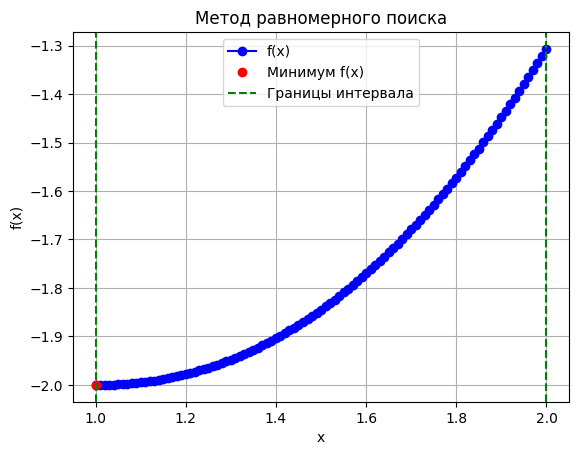

Метод равномерного поиска:
Точка минимума: x* ≈ 1.0
Минимальное значение функции: f(x*) ≈ -2.0
Количество вычислений функции: 101


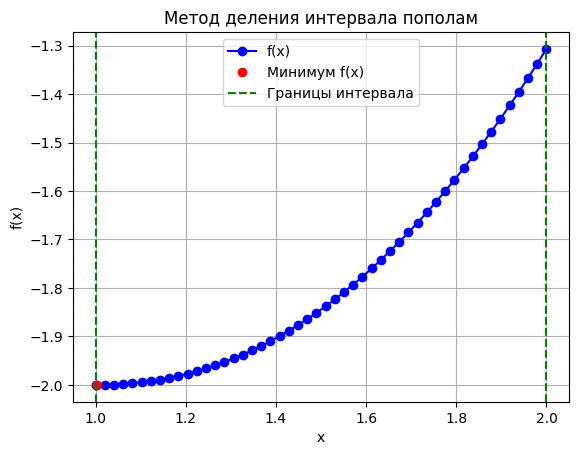

Метод деления интервала пополам
Точка минимума: x* ≈ 1.00390625
Минимальное значение функции: f(x*) ≈ -1.9999923507952801
Количество вычислений функции: 22


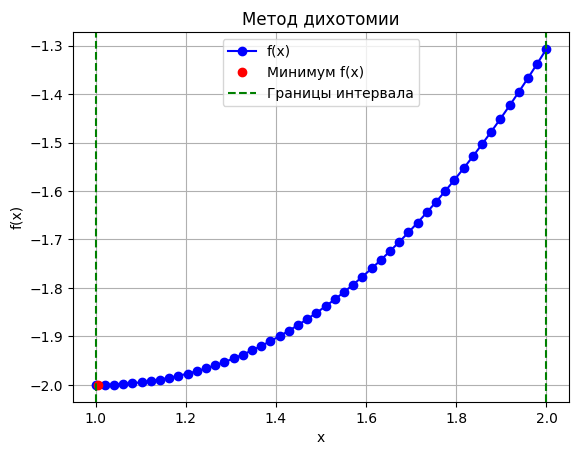

Метод дихотомии:
Точка минимума: x* ≈ 1.0044023437499998
Минимальное значение функции: f(x*) ≈ -1.9999902813382602
Количество вычислений функции: 15


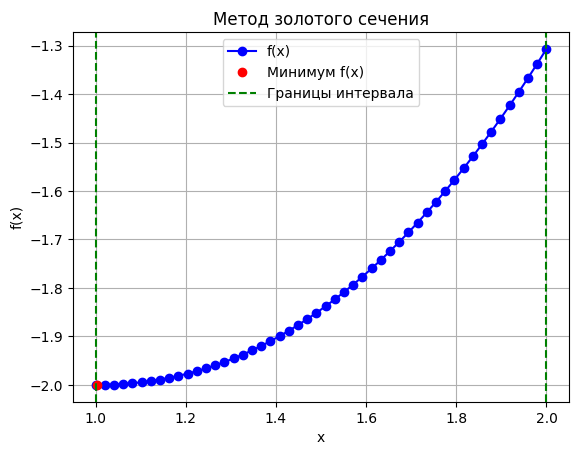

Метод золотого сечения:
Точка минимума: x* ≈ 1.0040653093778902
Минимальное значение функции: f(x*) ≈ -1.9999917143024555
Количество вычислений функции: 13


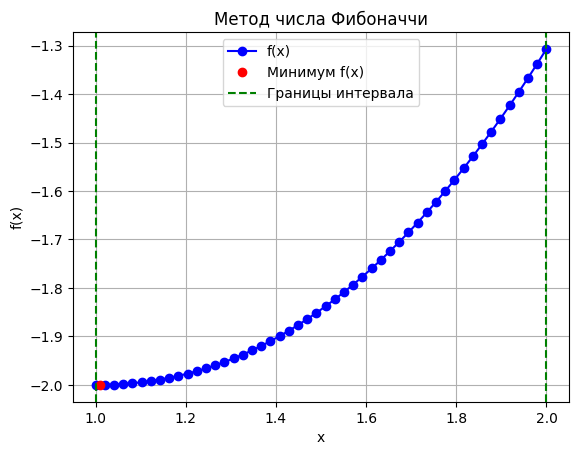

Метод Фибоначчи:
Точка минимума: x* ≈ 1.0102083333333334
Минимальное значение функции: f(x*) ≈ -1.999947543054519
Количество вычислений функции: 12


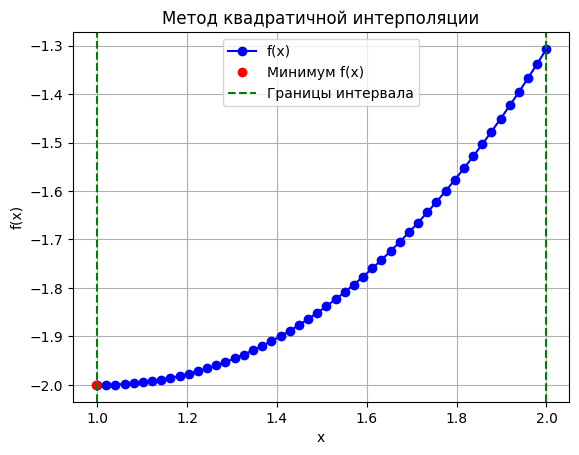

Метод квадратичной интерполяции:
Точка минимума: x* ≈ 0.9966295572781337
Минимальное значение функции: f(x*) ≈ -1.999994332852891
Количество вычислений функции: 1


In [9]:
def f(x):
    return x**2 - 3 * x + np.log(x)
min_x = 1
max_x = 2
uniform_search(min_x, max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)
fibonacci_search(min_x, max_x, f)
quadratic_interpolation_search(min_x, max_x, f)

## $$ y = 0.25x^4 + x^2 -8x + 12, x \in [0, 2]$$

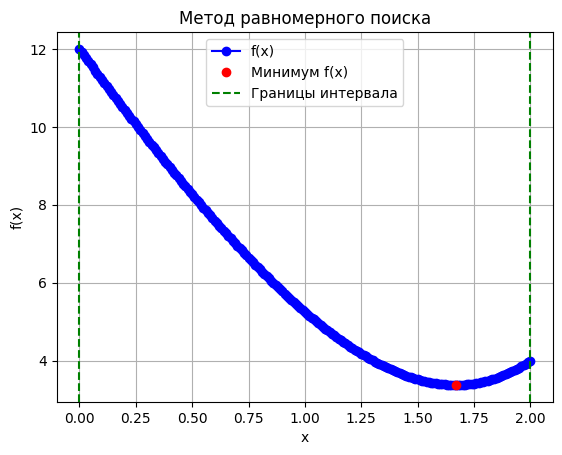

Метод равномерного поиска:
Точка минимума: x* ≈ 1.67
Минимальное значение функции: f(x*) ≈ 3.3733908025000012
Количество вычислений функции: 201


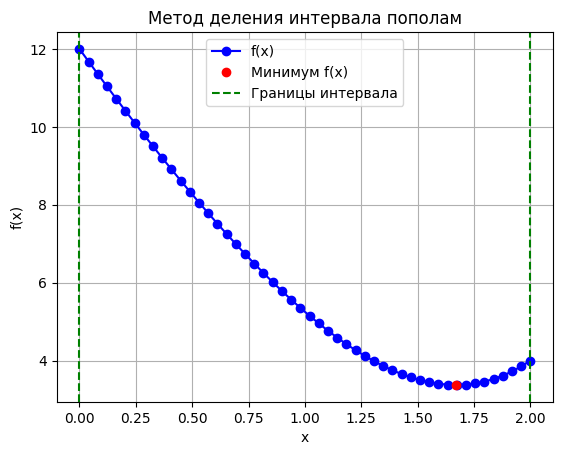

Метод деления интервала пополам
Точка минимума: x* ≈ 1.671875
Минимальное значение функции: f(x*) ≈ 3.3734042793512344
Количество вычислений функции: 25


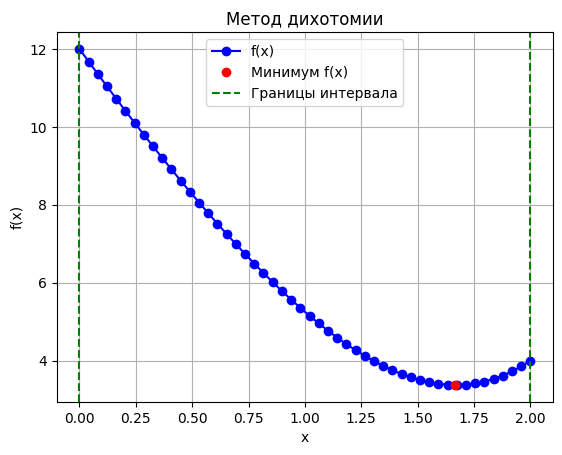

Метод дихотомии:
Точка минимума: x* ≈ 1.6676347656250003
Минимальное значение функции: f(x*) ≈ 3.3734257783994614
Количество вычислений функции: 17


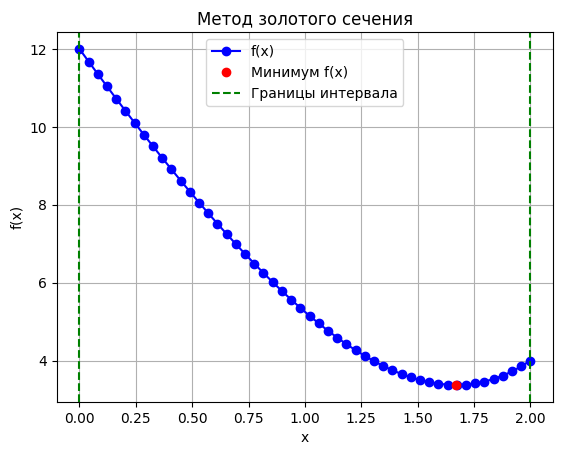

Метод золотого сечения:
Точка минимума: x* ≈ 1.6687370800100894
Минимальное значение функции: f(x*) ≈ 3.3734022704364293
Количество вычислений функции: 15


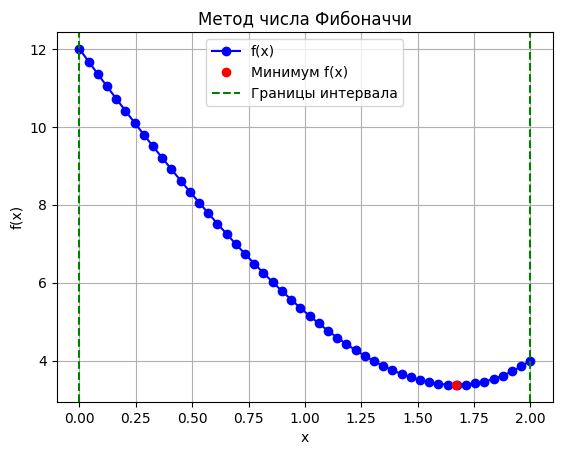

Метод Фибоначчи:
Точка минимума: x* ≈ 1.6680901287553649
Минимальное значение функции: f(x*) ≈ 3.3734145430424967
Количество вычислений функции: 13


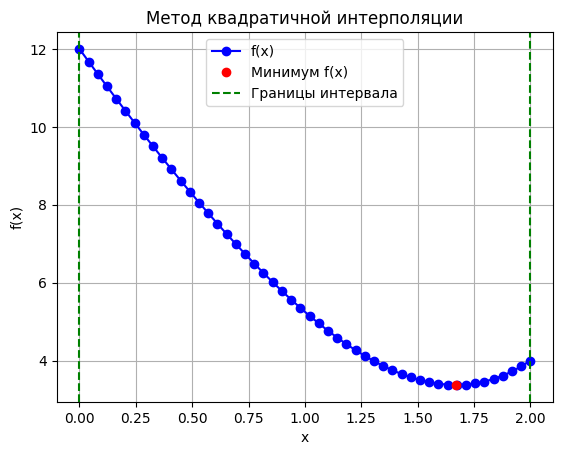

Метод квадратичной интерполяции:
Точка минимума: x* ≈ 1.6686341368631505
Минимальное значение функции: f(x*) ≈ 3.373403933405294
Количество вычислений функции: 4


In [10]:
def f(x):
    return 0.25*x**4 + x**2 - 8*x + 12
min_x = 0
max_x = 2
# x0 = 1.5, N = 100, t = 0.5
uniform_search(min_x,max_x, f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)
fibonacci_search(min_x, max_x, f)
quadratic_interpolation_search(min_x, max_x, f)

## $$ y = x^6 - 2.08x^5 + 0.4875x^4 +7.1x^3 -3.95x^2 - x + 0.1, x \in [-2, 2]$$

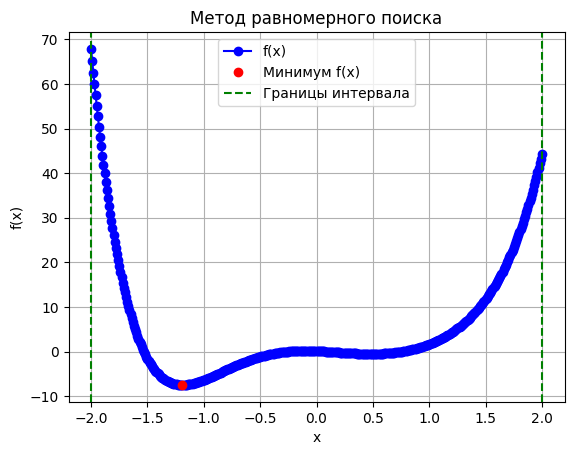

Метод равномерного поиска:
Точка минимума: x* ≈ -1.19
Минимальное значение функции: f(x*) ≈ -7.487244567252002
Количество вычислений функции: 401


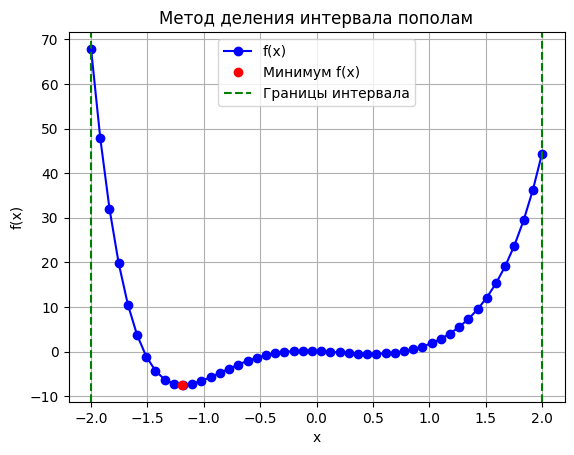

Метод деления интервала пополам
Точка минимума: x* ≈ -1.19140625
Минимальное значение функции: f(x*) ≈ -7.48731190937203
Количество вычислений функции: 28


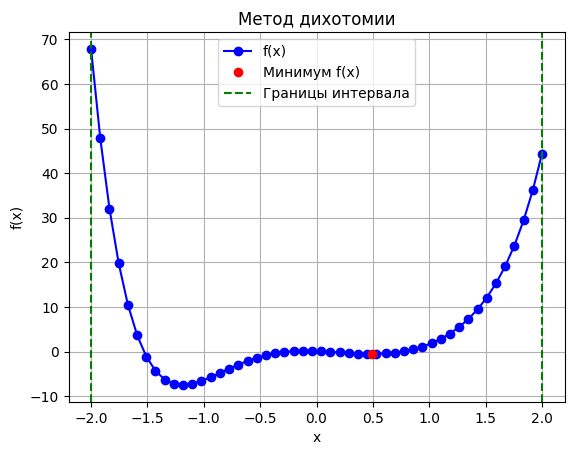

Метод дихотомии:
Точка минимума: x* ≈ 0.4881591796875
Минимальное значение функции: f(x*) ≈ -0.5199565128296789
Количество вычислений функции: 19


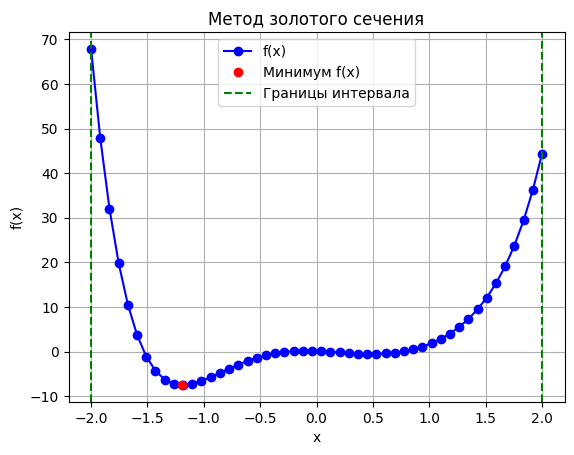

Метод золотого сечения:
Точка минимума: x* ≈ -1.1896567475443511
Минимальное значение функции: f(x*) ≈ -7.487204085650996
Количество вычислений функции: 16


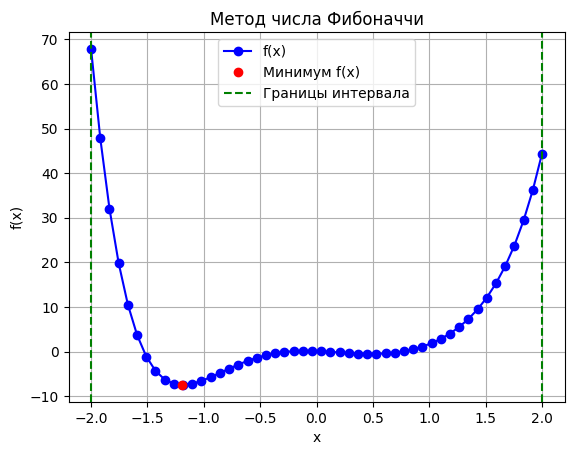

Метод Фибоначчи:
Точка минимума: x* ≈ -1.1918032786885249
Минимальное значение функции: f(x*) ≈ -7.487302166537052
Количество вычислений функции: 15


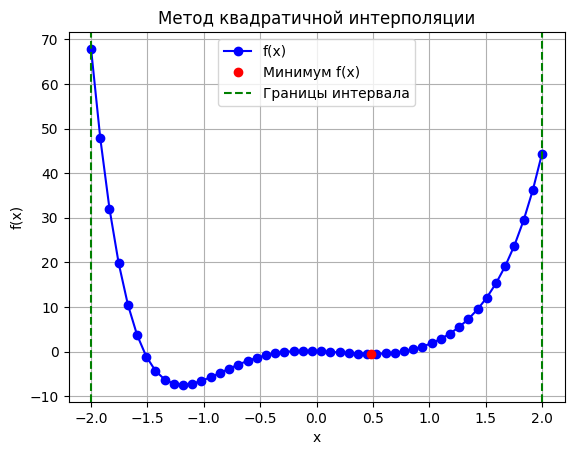

Метод квадратичной интерполяции:
Точка минимума: x* ≈ 0.48123578734772793
Минимальное значение функции: f(x*) ≈ -0.5198426392522976
Количество вычислений функции: 4


In [11]:
def f(x):
    return x**6 - 2.08 * x**5 + 0.4875 * x**4 + 7.1 * x**3 - 3.95 * x**2 - x +0.1
min_x = -2
max_x = 2

uniform_search(min_x,max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)
fibonacci_search(min_x, max_x, f)
quadratic_interpolation_search(min_x, max_x, f)

## $$ y = 2 - \sin{6x} - \sin{4x}, x \in [0, 2.8]$$

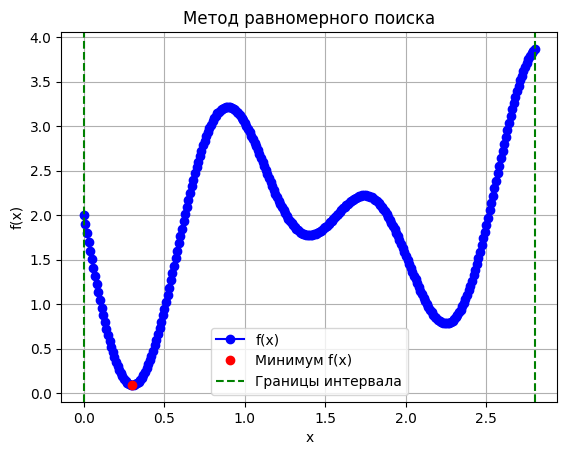

Метод равномерного поиска:
Точка минимума: x* ≈ 0.3
Минимальное значение функции: f(x*) ≈ 0.09411328315457856
Количество вычислений функции: 281


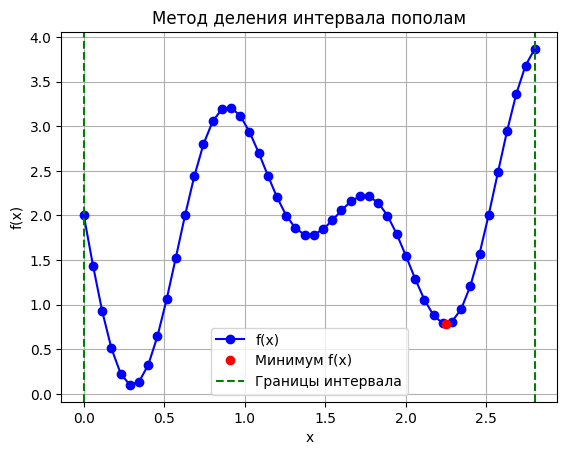

Метод деления интервала пополам
Точка минимума: x* ≈ 2.2476562499999995
Минимальное значение функции: f(x*) ≈ 0.7840187482072254
Количество вычислений функции: 28


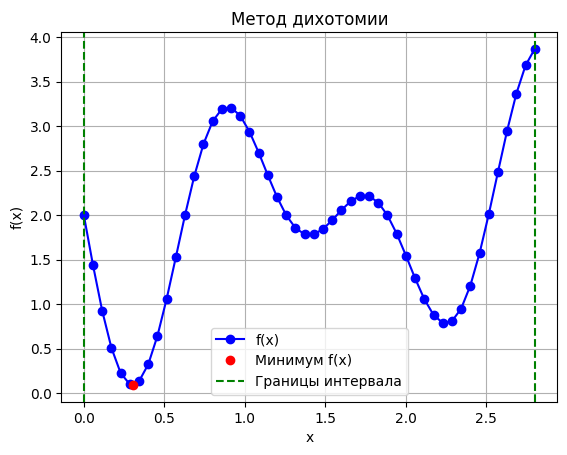

Метод дихотомии:
Точка минимума: x* ≈ 0.3039072265624999
Минимальное значение функции: f(x*) ≈ 0.09415757643167233
Количество вычислений функции: 19


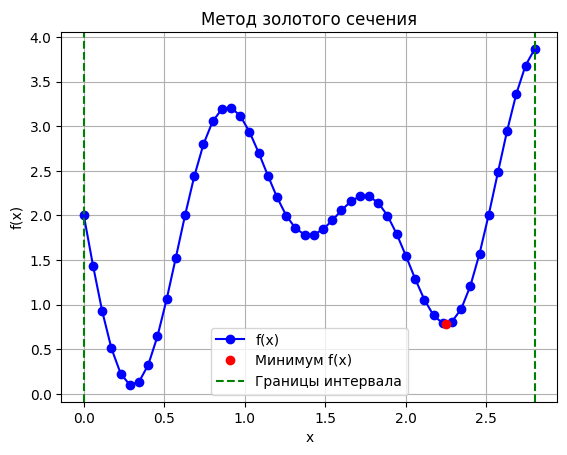

Метод золотого сечения:
Точка минимума: x* ≈ 2.248490457560343
Минимальное значение функции: f(x*) ≈ 0.784024318047579
Количество вычислений функции: 15


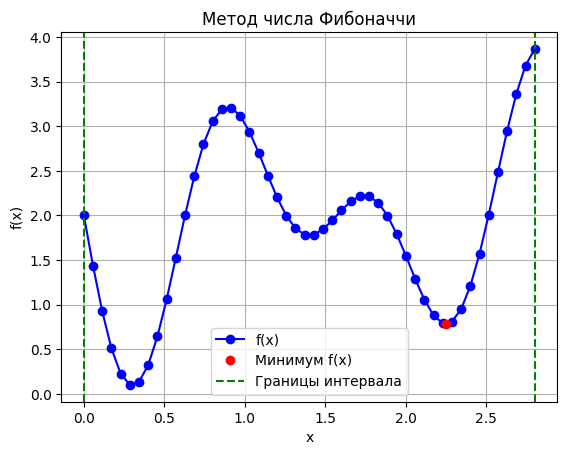

Метод Фибоначчи:
Точка минимума: x* ≈ 2.2461140583554373
Минимальное значение функции: f(x*) ≈ 0.7840732188015946
Количество вычислений функции: 14


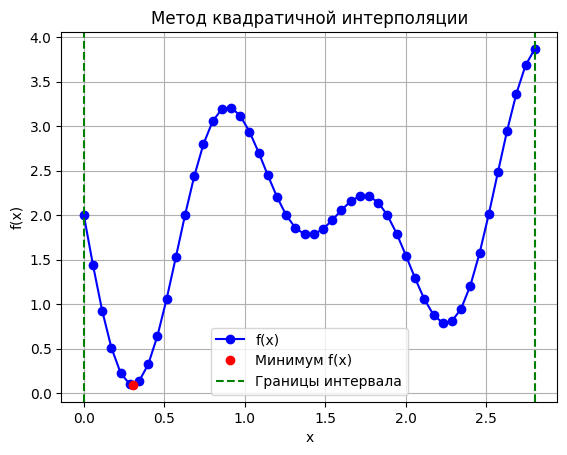

Метод квадратичной интерполяции:
Точка минимума: x* ≈ 0.3027047293586835
Минимальное значение функции: f(x*) ≈ 0.0940627803350037
Количество вычислений функции: 4


In [12]:
def f(x):
    return 2 - np.sin(6 * x) - np.sin(4 * x)
min_x = 0
max_x = 2.8

uniform_search(min_x,max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)
fibonacci_search(min_x, max_x, f)
quadratic_interpolation_search(min_x, max_x, f)

# Выводы по методам:

## Метод равномерного поиска

Метод равномерного поиска решает задачи с наибольшим количеством вычислений функции. Точность у метода высокая. Лучше всего данный метод справился с первой задачей.

## Метод деления интервала пополам

Данный метод работает быстрее метода равномерного поиска, но медленнее других методов. Сложнее всего пришлось с задачей 3 и 4 (по 28 вычислений функции). Так же для задачи 4 был найден глобальный оптимум.

## Метод дихотомии

Данный метод работает лучше метода ранвомерного поиска и деления интервала пополам. Больше всего вычислений функции потребовалось для задач 3 и 4.

## Метод золотого сечения

Данный метод работает лучше предыдущих, и чуть хуже по сравнению с числами Фибоначчи. Больше всего вычислений функции потребовалось для задачи 3 (16 вычислений). Так же найден глобальный оптимум в задаче 4.

## Метод числа Фибоначчи

Данный метод работает лучше предыдущих. Больше всего вычислений функции потребовалось для задачи 3. Так же найден глобальный оптимум в задаче 4. 

## Метод квадраотичной интерполяции

Данный метод работает быстрее всех. Это может быть связано с точкой, которую я беру за начальную ($x_1  = 1$), но скорость в разы лучше предыдущих методов. 